In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # Görüntü İşlemleri
from tensorflow.keras.models import Sequential # Yeni Model Oluşturacağız
from tensorflow.keras.layers import Dense # Kendi Modelimizi Oluşturacağız
from tensorflow.keras.applications.vgg16 import VGG16  # VGG16 kullanacağız.
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Boyutlandırma işlemleri
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Datasetlerin dosya konumunu belirttik.
train_files_path="airplanedataset/Train/"
test_files_path="airplanedataset/Test/"

#Test için datasetten veri çekelim.
img = load_img(test_files_path+"B-52/3-1.jpg")

In [3]:
print(img_to_array(img).shape) #fotoğraf boyutuna bakalım

(230, 266, 3)


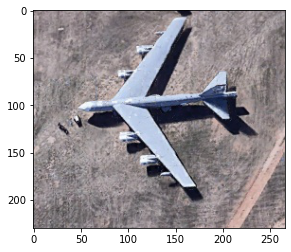

In [4]:
plt.imshow(img)
plt.show()
#test için veri çekelim

In [5]:
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))
#VGG16 224x224 istediği için veri boyutunu buna göre ayarladık.

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [6]:
numberOfAirplaneTypes=5 #5 farklı askeri uçak modelim var

In [7]:
#Model tasarımını oluşturalım
vgg=VGG16()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
vgg_layers=vgg.layers
print(vgg_layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000022FA2A2FD30>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022FA2A71860>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022FA2AE2400>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000022FA2B33710>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022FA2B33668>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022FA2B47DA0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000022FA2B5BF60>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022FA2B66CC0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022FA2B71828>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022FA2B7F6D8>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000022FA2B8FF28>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000022F

In [9]:
vggmodel_layersize_tobe_used=len(vgg_layers)-1

model=Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [10]:
# VGG16'nın tüm orijinal 16 katmanını yeniden eğitmek istemediğimden
# yaklaşık 138 milyon (yaklaşık) parametreye sahip. VGG modeli iyi tren parametrelerine sahip, onları kullanacağım!!
for layers in model.layers:
    layers.trainable = False
# VGG16'nın orijinal çıktı katmanını atladığım için yeni çıktı katmanımı yeni modelime eklemem gerekiyor!
model.add(Dense(numberOfAirplaneTypes, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
# Model tasarımı tamamlandıktan sonra derleme zamanı...
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [ ]:
batch_size = 4 

model.fit_generator(train_data,
                           steps_per_epoch=400//batch_size,
                           epochs= 3, # You can increase epoch size if you have a computer with good specs...
                           validation_data=test_data,
                           validation_steps= 200//batch_size)

Epoch 1/3
 22/100 [=====>........................] - ETA: 6:06 - loss: 1.1639 - acc: 0.6946

In [ ]:
img = Image.open("f22.jpg").resize((224,224))

In [ ]:
img = np.array(img)

In [ ]:
img.shape

In [24]:
print(img.ndim)

3


In [25]:
img = img.reshape(-1,224,224,3) #yeniden şekillendirme

In [26]:
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [27]:
img = preprocess_input(img)

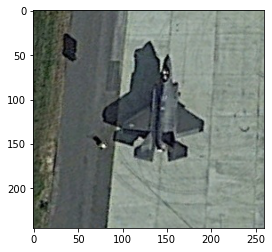

In [28]:
img_for_display = load_img("f22.jpg")
plt.imshow(img_for_display)
plt.show()

In [29]:
preds = model.predict(img)

In [30]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

In [31]:
preds

array([[1.0977136e-07, 2.4933966e-05, 3.2892139e-08, 9.9995792e-01,
        1.7021757e-05]], dtype=float32)

In [32]:
result = np.argmax(preds[0])
print(image_classes[result]) 

F-22 Raptor
